In [ ]:
import os 
if os.path.basename(os.getcwd()) == "notebooks": os.chdir("..")
import datajoint as dj
from datetime import datetime
from pathlib import Path
import re
import numpy as np
import intanrhdreader
from pprint import pprint
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import signal
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from workflow.pipeline import lineage, culture
from workflow.pipeline import probe, ephys, analysis
from workflow.utils import ingestion_utils
from workflow.utils.paths import (get_ephys_root_data_dir, get_raw_root_data_dir, get_repo_dir, get_organoid_directory)

[2023-11-07 20:20:47,780][INFO]: Connecting utah-worker@db.datajoint.com:3306
[2023-11-07 20:20:48,165][INFO]: Connected utah-worker@db.datajoint.com:3306


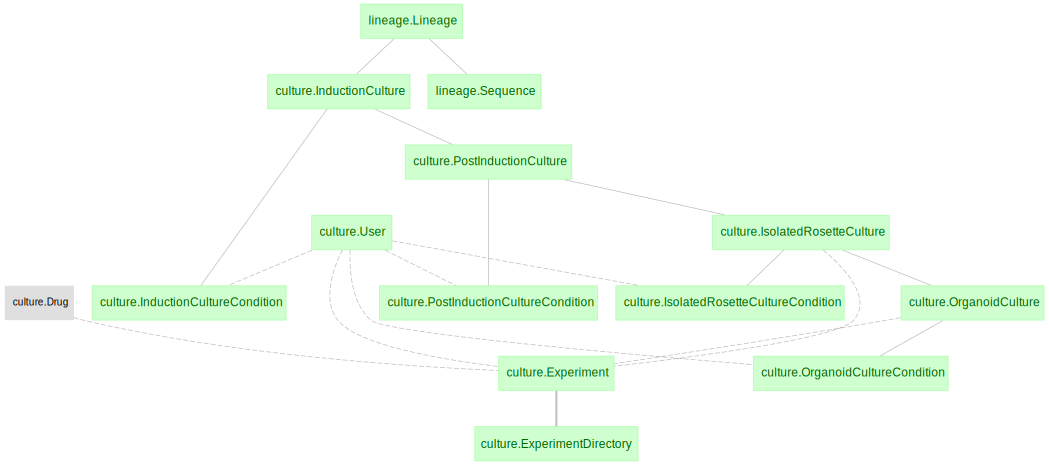

In [ ]:
dj.Diagram(lineage) + dj.Diagram(culture)

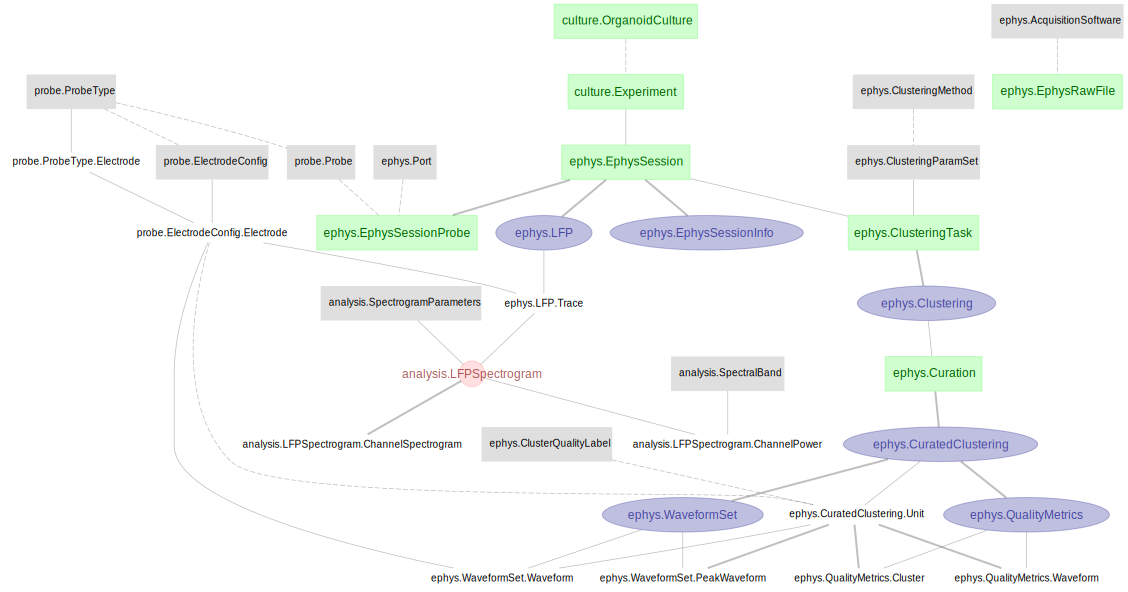

In [ ]:
dj.Diagram(culture.OrganoidCulture) + dj.Diagram(probe) + dj.Diagram(ephys) + dj.Diagram(analysis)

### Insert into `culture.Experiment` upstream from the ephys schema.

In [ ]:
# ingestion_utils.ingest_experiment()
culture.Experiment()

organoid_id e.g. O17,experiment_start_time,experiment_end_time,user,lineage_id de-identified code (e.g. hmau001),induction_culture_date,induction_culture_plate,post_induction_culture_date,post_induction_culture_plate,isolated_rosette_culture_date Date for isolating the rosette,isolated_rosette_culture_plate,organoid_culture_date,organoid_culture_plate,drug_name,drug_concentration concentration in uM,"experiment_plan e.g. mrna lysate, oct, protein lysate, or matrigel embedding, ephys, tracing"
O09,2023-05-18 12:25:00,2023-05-18 18:15:00,None,None,None,None,None,None,None,None,None,None,4-AP,100.0,ephys
O09,2023-05-18 18:15:00,2023-05-19 09:30:00,None,None,None,None,None,None,None,None,None,None,No Drug,nan,ephys
O09,2023-05-19 09:30:00,2023-05-19 15:35:00,None,None,None,None,None,None,None,None,None,None,Bicuculline,50.0,ephys
O09,2023-05-19 15:45:00,2023-05-20 15:40:00,None,None,None,None,None,None,None,None,None,None,Tetrodotoxin,1.0,ephys
O10,2023-05-18 12:25:00,2023-05-18 18:15:00,None,None,None,None,None,None,None,None,None,None,4-AP,100.0,ephys
O10,2023-05-18 18:15:00,2023-05-19 09:30:00,None,None,None,None,None,None,None,None,None,None,No Drug,nan,ephys
O10,2023-05-19 09:30:00,2023-05-19 15:35:00,None,None,None,None,None,None,None,None,None,None,Bicuculline,50.0,ephys
O10,2023-05-19 15:45:00,2023-05-20 15:40:00,None,None,None,None,None,None,None,None,None,None,Tetrodotoxin,1.0,ephys
O11,2023-05-18 12:25:00,2023-05-18 18:15:00,None,None,None,None,None,None,None,None,None,None,4-AP,100.0,ephys
O11,2023-05-18 18:15:00,2023-05-19 09:30:00,None,None,None,None,None,None,None,None,None,None,No Drug,nan,ephys


### Insert into `probe.ProbeType`, `probe.Probe`, and `probe.ElectrodeConfig`

In [ ]:
# ingestion_utils.ingest_probe()
display(probe.ProbeType())
display(probe.ProbeType.Electrode())
display(probe.ElectrodeConfig())
display(probe.ElectrodeConfig.Electrode())
display(probe.Probe())

probe_type e.g. A1x32-6mm-100-177-H32_21mm,"probe_full_name full, non-abbreviated name of the probe"
A1x32-6mm-100-177-H32_21mm,None


probe_type e.g. A1x32-6mm-100-177-H32_21mm,"electrode electrode index, starts at 0","shank shank index, starts at 0, advance left to right","shank_col column index, starts at 0, advance left to right","shank_row row index, starts at 0.",x_coord (um) x coordinate of the electrode within the probe.,y_coord (um) y coordinate of the electrode within the probe.
A1x32-6mm-100-177-H32_21mm,0,0,0,0,0.0,0.0
A1x32-6mm-100-177-H32_21mm,1,0,0,1,0.0,100.0
A1x32-6mm-100-177-H32_21mm,2,0,0,2,0.0,200.0
A1x32-6mm-100-177-H32_21mm,3,0,0,3,0.0,300.0
A1x32-6mm-100-177-H32_21mm,4,0,0,4,0.0,400.0
A1x32-6mm-100-177-H32_21mm,5,0,0,5,0.0,500.0
A1x32-6mm-100-177-H32_21mm,6,0,0,6,0.0,600.0
A1x32-6mm-100-177-H32_21mm,7,0,0,7,0.0,700.0
A1x32-6mm-100-177-H32_21mm,8,0,0,8,0.0,800.0
A1x32-6mm-100-177-H32_21mm,9,0,0,9,0.0,900.0


electrode_config_hash,probe_type e.g. A1x32-6mm-100-177-H32_21mm,electrode_config_name user friendly name
699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,0-31


electrode_config_hash,probe_type e.g. A1x32-6mm-100-177-H32_21mm,"electrode electrode index, starts at 0","channel channel name fetched from raw data (e.g., A-001)"
699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,0,19
699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,4
699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,2,18
699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,3,5
699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,4,17
699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,5,6
699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,6,31
699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,7,8
699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,8,30
699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,9,9


probe unique identifier for this model of probe (e.g. serial number),probe_type e.g. A1x32-6mm-100-177-H32_21mm,probe_comment
12D4D,A1x32-6mm-100-177-H32_21mm,
12D51,A1x32-6mm-100-177-H32_21mm,
12D76,A1x32-6mm-100-177-H32_21mm,
12D77,A1x32-6mm-100-177-H32_21mm,
Q983,A1x32-6mm-100-177-H32_21mm,
T590,A1x32-6mm-100-177-H32_21mm,
T591,A1x32-6mm-100-177-H32_21mm,
T593,A1x32-6mm-100-177-H32_21mm,
T595,A1x32-6mm-100-177-H32_21mm,


### Insert into `ephys.EphysRawFile`

Sample dataset directory structure including multiple subjects, a continuous recording session, and a single probe for each subject

In [ ]:
# ingestion_utils.ingest_ephys_files()
ephys.EphysRawFile()

[2023-11-07 17:31:15,762][INFO]: 8 files have been inserted into ephys.EphysRawFile table


file_path path to the file on the external store relative to the root directory,acq_software,file_time date and time of the file acquisition,parent_folder parent folder containing the file,"filename_prefix filename prefix, if any, excluding the datetime information",file
O17-20_raw/O17-20_230630_024921.rhd,Intan,2023-06-30 02:49:21,O17-20_raw,O17-20,=BLOB=
O17-20_raw/O17-20_230630_025021.rhd,Intan,2023-06-30 02:50:21,O17-20_raw,O17-20,=BLOB=
O17-20_raw/O17-20_230630_025121.rhd,Intan,2023-06-30 02:51:21,O17-20_raw,O17-20,=BLOB=
O17-20_raw/O17-20_230630_025221.rhd,Intan,2023-06-30 02:52:21,O17-20_raw,O17-20,=BLOB=
O17-20_raw/O17-20_230713_183014.rhd,Intan,2023-07-13 18:30:14,O17-20_raw,O17-20,=BLOB=
O17-20_raw/O17-20_230713_183114.rhd,Intan,2023-07-13 18:31:14,O17-20_raw,O17-20,=BLOB=
O17-20_raw/O17-20_230713_183214.rhd,Intan,2023-07-13 18:32:14,O17-20_raw,O17-20,=BLOB=
O17-20_raw/O17-20_230713_183314.rhd,Intan,2023-07-13 18:33:14,O17-20_raw,O17-20,=BLOB=


### Insert into `ephys.EphysSession`

In [ ]:
culture.Experiment & "organoid_id='O17'"

organoid_id e.g. O17,experiment_start_time,experiment_end_time,user,lineage_id de-identified code (e.g. hmau001),induction_culture_date,induction_culture_plate,post_induction_culture_date,post_induction_culture_plate,isolated_rosette_culture_date Date for isolating the rosette,isolated_rosette_culture_plate,organoid_culture_date,organoid_culture_plate,drug_name,drug_concentration concentration in uM,"experiment_plan e.g. mrna lysate, oct, protein lysate, or matrigel embedding, ephys, tracing"
O17,2023-07-12 13:10:00,2023-07-12 16:10:00,None,None,None,None,None,None,None,None,None,None,4-AP,100.0,ephys
O17,2023-07-12 16:10:00,2023-07-13 12:35:00,None,None,None,None,None,None,None,None,None,None,No Drug,nan,ephys
O17,2023-07-13 12:35:00,2023-07-13 18:10:00,None,None,None,None,None,None,None,None,None,None,Bicuculline,50.0,ephys
O17,2023-07-13 18:15:00,2023-07-14 15:45:00,None,None,None,None,None,None,None,None,None,None,Tetrodotoxin,1.0,ephys


In [ ]:
# Modify session_info to manually insert session entries
session_info = dict(
    organoid_id="O17",
    experiment_start_time="2023-07-13 18:15:00",
    insertion_number=0,
    start_time="2023-07-13 18:30:00",
    end_time="2023-07-13 18:35:00",
    session_type="lfp",
    probe="Q983",
    port_id="A",
    used_electrodes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,17, 18, 19, 20, 21]
)

ephys.EphysSession.insert1(session_info, ignore_extra_fields=True, skip_duplicates=True)

ephys.EphysSessionProbe.insert1(session_info, ignore_extra_fields=True, skip_duplicates=True)

display(ephys.EphysSession())
display(ephys.EphysSessionProbe())

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,session_type
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,lfp


organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,probe unique identifier for this model of probe (e.g. serial number),port_id,"used_electrodes list of electrode IDs used in this session (if null, all electrodes are used)"
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,Q983,A,=BLOB=


### Populate `ephys.EphysSessionInfo` and `ephys.LFP`


In [ ]:
key = {'organoid_id': 'O17',
 'experiment_start_time': datetime(2023, 7, 13, 18, 15),
 'insertion_number': 0,
 'start_time': datetime(2023, 7, 13, 18, 30),
 'end_time': datetime(2023, 7, 13, 18, 35)}  # organoid key

In [ ]:
ephys.EphysSessionInfo.populate(key)
session_info = ephys.EphysSessionInfo.fetch1("session_info")
pprint(session_info)

{'amplifier_channels': [{'board_stream': 0,
                         'chip_channel': 0,
                         'custom_channel_name': 'A-000',
                         'custom_order': 0,
                         'electrode_impedance_magnitude': 41204.3515625,
                         'electrode_impedance_phase': -20.303863525390625,
                         'native_channel_name': 'A-000',
                         'native_order': 0,
                         'port_name': 'Port A',
                         'port_number': 1,
                         'port_prefix': 'A'},
                        {'board_stream': 0,
                         'chip_channel': 1,
                         'custom_channel_name': 'A-001',
                         'custom_order': 1,
                         'electrode_impedance_magnitude': 40965.7578125,
                         'electrode_impedance_phase': -20.08125114440918,
                         'native_channel_name': 'A-001',
                         'native

In [ ]:
ephys.LFP.populate(key)

display(ephys.LFP())
display(ephys.LFP.Trace())

[2023-11-07 20:21:18,013][INFO]: Populating ephys.LFP for <{'organoid_id': 'O17', 'experiment_start_time': datetime.datetime(2023, 7, 13, 18, 15), 'insertion_number': 0, 'start_time': datetime.datetime(2023, 7, 13, 18, 30), 'end_time': datetime.datetime(2023, 7, 13, 18, 35)}>


organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,lfp_sampling_rate Down-sampled sampling rate (Hz).
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,2500.0


organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,electrode_config_hash,probe_type e.g. A1x32-6mm-100-177-H32_21mm,"electrode electrode index, starts at 0",lfp
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,6,=BLOB=
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,4,=BLOB=
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,19,=BLOB=
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,0,=BLOB=
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,14,=BLOB=
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,20,=BLOB=
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,=BLOB=
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,2,=BLOB=
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,9,=BLOB=
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,13,=BLOB=


### Plot data


In [ ]:
query = (ephys.LFP & key) * ephys.EphysSessionProbe * ephys.LFP.Trace * probe.ElectrodeConfig.Electrode  

query

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,electrode_config_hash,probe_type e.g. A1x32-6mm-100-177-H32_21mm,"electrode electrode index, starts at 0",lfp_sampling_rate Down-sampled sampling rate (Hz).,probe unique identifier for this model of probe (e.g. serial number),port_id,"used_electrodes list of electrode IDs used in this session (if null, all electrodes are used)",lfp,"channel channel name fetched from raw data (e.g., A-001)"
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,0,2500.0,Q983,A,=BLOB=,=BLOB=,19
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,2500.0,Q983,A,=BLOB=,=BLOB=,4
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,2,2500.0,Q983,A,=BLOB=,=BLOB=,18
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,3,2500.0,Q983,A,=BLOB=,=BLOB=,5
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,4,2500.0,Q983,A,=BLOB=,=BLOB=,17
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,5,2500.0,Q983,A,=BLOB=,=BLOB=,6
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,6,2500.0,Q983,A,=BLOB=,=BLOB=,31
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,7,2500.0,Q983,A,=BLOB=,=BLOB=,8
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,8,2500.0,Q983,A,=BLOB=,=BLOB=,30
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,9,2500.0,Q983,A,=BLOB=,=BLOB=,9


In [ ]:
lfp_info = (ephys.LFP & key).fetch1()
lfp_info

{'organoid_id': 'O17',
 'experiment_start_time': datetime.datetime(2023, 7, 13, 18, 15),
 'insertion_number': 0,
 'start_time': datetime.datetime(2023, 7, 13, 18, 30),
 'end_time': datetime.datetime(2023, 7, 13, 18, 35),
 'lfp_sampling_rate': 2500.0}

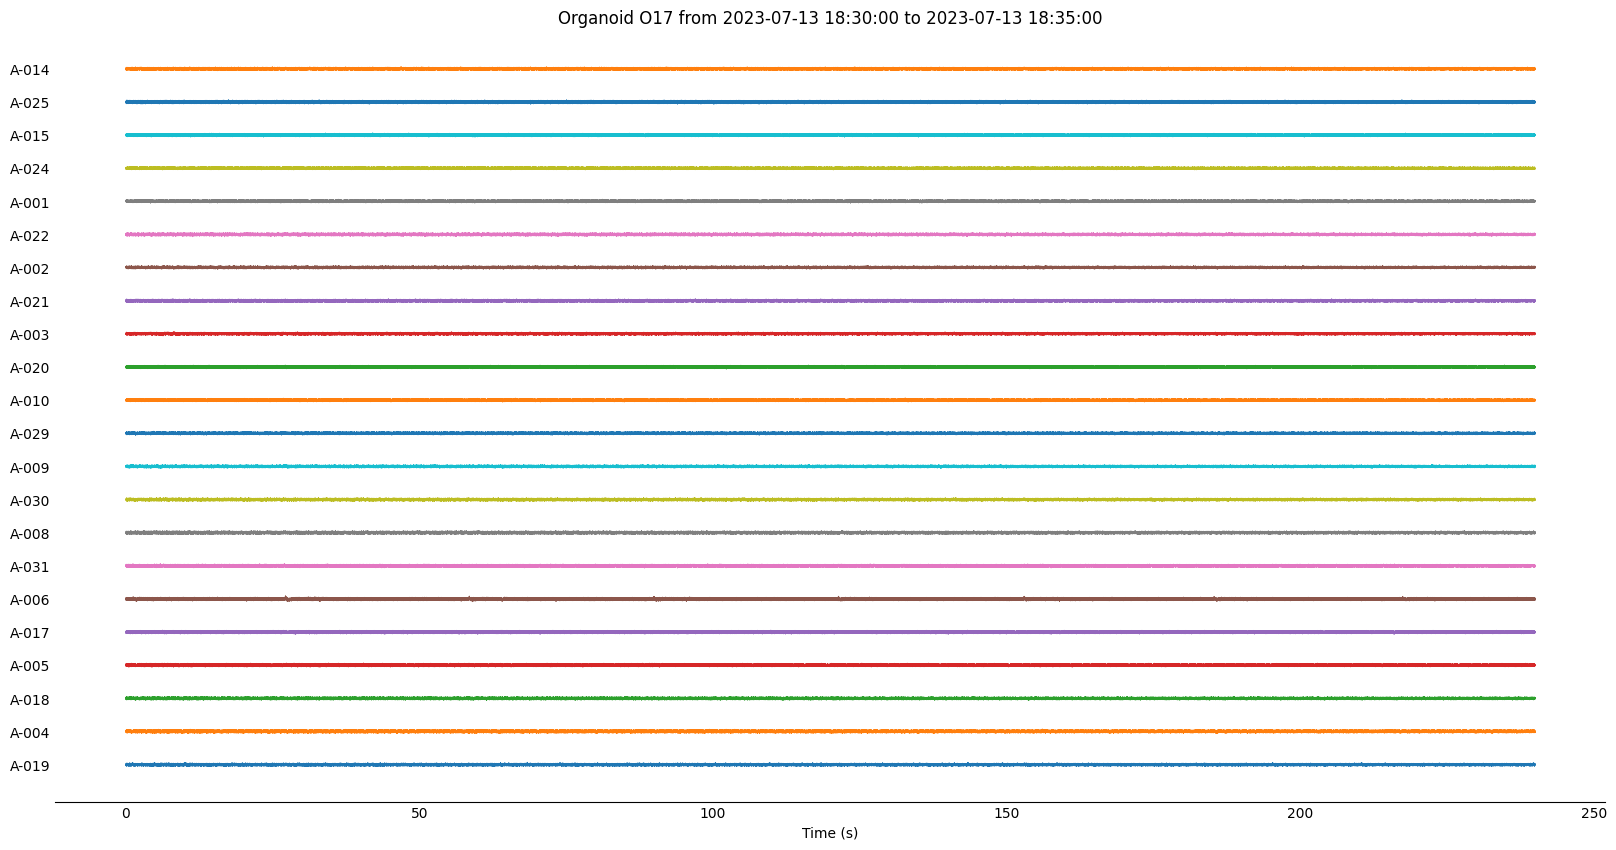

In [ ]:
ytick_loc = []
ytick_labels = []  # Create a list to store y-tick labels

fig, ax = plt.subplots(figsize=(20, 10))

for i, lfp_info in enumerate(query):
    if i == 0:
        time = np.r_[:len(lfp_info["lfp"])] / lfp_info["lfp_sampling_rate"]
    
    ytick_loc.append(i * 500)
    ax.plot(time, lfp_info["lfp"] + ytick_loc[-1], linewidth=0.5)
    
    # Create a label for the current channel
    channel_label = f'{lfp_info["port_id"]}-{lfp_info["channel"]:0>3}'
    ytick_labels.append(channel_label)  # Append the label to the list

ax.set(xlabel="Time (s)", title=f'Organoid {key["organoid_id"]} from {str(key["start_time"])} to {str(key["end_time"])}')
ax.set_yticks(ytick_loc)
ax.set_yticklabels(ytick_labels)  # Set y-tick labels using the list
ax.tick_params(length=0)
sns.despine(right=True, left=True)